In [160]:
import numpy as np
import pandas as pd
import xgboost as xgb

In [401]:
# function to bootstrap sample dt
def bootstrap_sample(dt, n):
    # n is the number of samples to draw
    # dt is the dataframe to draw from
    # returns a dataframe of the same size as dt
    idx = np.random.choice(dt.index, size = n, replace = True)
    return dt.loc[idx]

# function to apply model to bootstrap sample
def apply_model_to_bootstrap_sample(dt, model):
    # dt is the dataframe to draw from
    # model is the model to apply
    # returns a dataframe of the same size as dt
    X = dt.drop(['label', 'id'], axis=1)
    y = dt['label']
    dtest = xgb.DMatrix(X)
    y_pred = model.predict(dtest)
    return y, y_pred

# function to calculate the AUC
def calculate_auc(y, y_pred):
    # y is the true labels
    # y_pred is the predicted labels
    # returns the AUC
    from sklearn.metrics import roc_auc_score
    return roc_auc_score(y, y_pred)

# function to calculate the accuracy
def calculate_accuracy(y, y_pred):
    # y is the true labels
    # y_pred is the predicted labels
    # returns the accuracy
    from sklearn.metrics import accuracy_score
    return accuracy_score(y, y_pred)

# function to calculate the precision
def calculate_precision(y, y_pred):
    # y is the true labels
    # y_pred is the predicted labels
    # returns the precision
    from sklearn.metrics import precision_score
    return precision_score(y, y_pred)
    
# function to calculate the recall
def calculate_recall(y, y_pred):
    # y is the true labels
    # y_pred is the predicted labels
    # returns the recall
    from sklearn.metrics import recall_score
    return recall_score(y, y_pred)
    
# function to calculate the F1 score
def calculate_f1(y, y_pred):
    # y is the true labels
    # y_pred is the predicted labels
    # returns the F1 score
    from sklearn.metrics import f1_score
    return f1_score(y, y_pred)
    
    

In [389]:
dur = 3
thresh = 3

In [404]:
def bootstrap_aegis(dur, thresh, n_samples=1000, sample_size=100):
    
    ## load data
    path = '~/Documents/data/CBGdata/xgboost_ready/duration_' + str(dur) + '_threshold_' + str(thresh) + '_bigaegis.csv'
    dt = pd.read_csv(path, index_col = False)

    # load model
    model_xgb_2 = xgb.Booster()
    model_xgb_2.load_model('~/Documents/code/cbg_code/unipoc_xgb_models/duration_' + str(dur) + '_threshold_' + str(thresh) + '_ratio_all_final_model.model')

    # use the loaded XGBoost model
    model = model_xgb_2

    # create a dataframe to store the results
    results = pd.DataFrame(columns = ['auc'])

    # loop through 1000 bootstrap samples
    for i in range(n_samples):
        # create a bootstrap sample
        dt_boot = bootstrap_sample(dt, sample_size)

        # only proceed if there are both positive and negative labels in the bootstrap sample    
        if (dt_boot['label'].sum() != 0):
            # apply the model to the bootstrap sample
            y, y_pred = apply_model_to_bootstrap_sample(dt_boot, model)
            #print(y_pred)
            # calculate the AUC
            auc = calculate_auc(y, y_pred)
            # add the results to the dataframe
            results.loc[i] = [auc]

    # print the median and interquartile range of the results
    print(results['auc'].median())
    print(results['auc'].quantile(0.25))
    print(results['auc'].quantile(0.75))

    # save the results
    results.to_csv('~/Documents/data/CBGdata/aegis_auc_data/duration_' + str(dur) + '_threshold_' + str(thresh) + '_ratio_all_final_model_bootstrap_results.csv')

In [405]:
dur = [3,4,5,6,7,8,9,10,21]
thresh = [3,4,5]

bootstrap_sample_n = 1000
bootstrap_sample_size = 100

# loop through dur and thresh
for d in dur:
    for t in thresh:
        bootstrap_aegis(d, t, bootstrap_sample_n, bootstrap_sample_size)

0.8203125
0.7109375
0.898989898989899
0.8029891304347826
0.754545177045177
0.857336956521739
0.813883580187928
0.7745629897528632
0.8528142857142857
0.8969072164948454
0.8010204081632653
0.9553264604810997
0.8736842105263158
0.8219117327856809
0.9131929367491678
0.8458988927738927
0.8122406269940734
0.8760829463364292
0.8591065292096218
0.7040816326530612
0.9739583333333334
0.8307291666666667
0.7603926651305684
0.8951919829579404
0.8310307301535371
0.7955450199617751
0.8662408200734394
0.8694158075601375
0.788470643939394
0.953404605263158
0.837173579109063
0.7733525815217391
0.8926315789473684
0.8376754075124025
0.8012757120253164
0.8722916296575921
0.8831615120274914
0.8121811224489797
0.9393939393939394
0.8402457757296466
0.7851839275608375
0.894012347225005
0.8369757803592888
0.8028409915795586
0.8691670620287104
0.9381443298969072
0.8877551020408163
0.9795918367346939
0.8962148962148963
0.8387687581235967
0.9350913843101343
0.859226795392954
0.8210183159232072
0.8912475132625994
0

XGBoostError: [21:37:20] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/dmlc-core/src/io/local_filesys.cc:209: Check failed: allow_null:  LocalFileSystem::Open "/Users/csainsbury/Documents/code/cbg_code/unipoc_xgb_models/duration_11_threshold_3_ratio_all_final_model.model": No such file or directory
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000013af0e534 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000013b1622e4 dmlc::io::LocalFileSystem::Open(dmlc::io::URI const&, char const*, bool) + 808
  [bt] (2) 3   libxgboost.dylib                    0x000000013b14eaec dmlc::Stream::Create(char const*, char const*, bool) + 68
  [bt] (3) 4   libxgboost.dylib                    0x000000013af2c700 XGBoosterLoadModel + 792
  [bt] (4) 5   libffi.8.dylib                      0x0000000103a1004c ffi_call_SYSV + 76
  [bt] (5) 6   libffi.8.dylib                      0x0000000103a0d7d4 ffi_call_int + 1336
  [bt] (6) 7   _ctypes.cpython-39-darwin.so        0x00000001039f010c _ctypes_callproc + 792
  [bt] (7) 8   _ctypes.cpython-39-darwin.so        0x00000001039eaa58 PyCFuncPtr_call + 236
  [bt] (8) 9   python3.9                           0x0000000102d0b90c _PyObject_MakeTpCall + 348



In [390]:
## load data
#path = '~/Documents/data/CBGdata/xgboost_ready/duration_7_threshold_3_single_day.csv'
path = '~/Documents/data/CBGdata/xgboost_ready/duration_' + str(dur) + '_threshold_' + str(thresh) + '_bigaegis.csv'

dt = pd.read_csv(path, index_col = False)

In [391]:
# load model
model_xgb_2 = xgb.Booster()
model_xgb_2.load_model('~/Documents/code/cbg_code/unipoc_xgb_models/duration_' + str(dur) + '_threshold_' + str(thresh) + '_ratio_all_final_model.model')

In [392]:
#X = dt.drop(['label', 'id'], axis=1)
#y = dt['label']

# use the loaded XGBoost model
model = model_xgb_2

In [394]:
print(dt.shape)

(1971, 33)


In [395]:
# create a dataframe to store the results
results = pd.DataFrame(columns = ['auc'])

# loop through 1000 bootstrap samples
for i in range(1000):
    # create a bootstrap sample
    dt_boot = bootstrap_sample(dt, 200)

    # only proceed if there are both positive and negative labels in the bootstrap sample
    #print(dt_boot['label'].sum() != 0)
    

    if (dt_boot['label'].sum() != 0):
        # apply the model to the bootstrap sample
        y, y_pred = apply_model_to_bootstrap_sample(dt_boot, model)
        #print(y_pred)
        # calculate the AUC
        auc = calculate_auc(y, y_pred)
        # calculate the accuracy
        #accuracy = calculate_accuracy(y, y_pred)
        # calculate the precision
        #precision = calculate_precision(y, y_pred)
        # calculate the recall
        #recall = calculate_recall(y, y_pred)
        # calculate the F1 score
        #f1 = calculate_f1(y, y_pred)
        # add the results to the dataframe
        results.loc[i] = [auc]



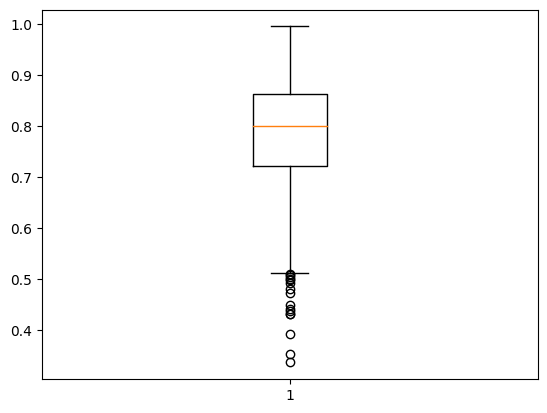

0.8005263157894738
0.7216876387860843
0.8625641025641025


In [400]:
# plot a boxplot of the results
import matplotlib.pyplot as plt
plt.boxplot(results['auc'])
plt.show()

# print the median and interquartile range of the results
print(results['auc'].median())
print(results['auc'].quantile(0.25))
print(results['auc'].quantile(0.75))

# save the results
results.to_csv('~/Documents/data/CBGdata/aegis_auc_data/duration_' + str(dur) + '_threshold_' + str(thresh) + '_ratio_all_final_model_bootstrap_results.csv')


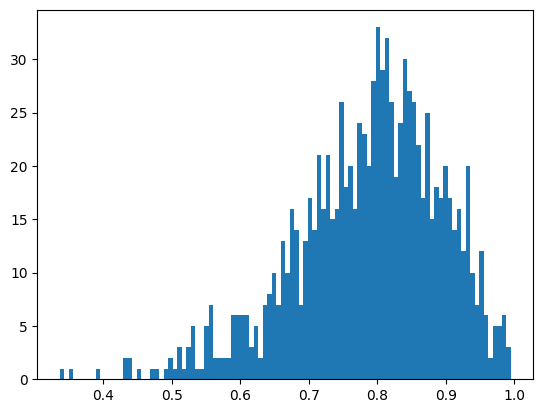

In [397]:
# plot histogram of the results
plt.hist(results['auc'], 100)
plt.show()


In [398]:
# run saved model
y_pred_proba = model.predict(xgb.DMatrix(X))

y_true = y

ValueError: feature_names mismatch: ['max_by_day_1', 'max_by_day_2', 'max_by_day_3', 'min_by_day_1', 'min_by_day_2', 'min_by_day_3', 'median_by_day_1', 'median_by_day_2', 'median_by_day_3', 'day_N_1', 'day_N_2', 'day_N_3', 'iqr_by_day_1', 'iqr_by_day_2', 'iqr_by_day_3', 'cV_by_day_1', 'cV_by_day_2', 'cV_by_day_3', 'cV', 'gradient', 'training_min', 'training_max', 'prior_overall_min', 'prior_overall_max', 'prior_duration', 'prior_gradient', 'prior_sd_cbg', 'prior_mean_cbg', 'prior_cV', 'prior_N_tests', 'time_from_index'] ['max_by_day_1', 'max_by_day_2', 'max_by_day_3', 'max_by_day_4', 'max_by_day_5', 'max_by_day_6', 'min_by_day_1', 'min_by_day_2', 'min_by_day_3', 'min_by_day_4', 'min_by_day_5', 'min_by_day_6', 'median_by_day_1', 'median_by_day_2', 'median_by_day_3', 'median_by_day_4', 'median_by_day_5', 'median_by_day_6', 'day_N_1', 'day_N_2', 'day_N_3', 'day_N_4', 'day_N_5', 'day_N_6', 'iqr_by_day_1', 'iqr_by_day_2', 'iqr_by_day_3', 'iqr_by_day_4', 'iqr_by_day_5', 'iqr_by_day_6', 'cV_by_day_1', 'cV_by_day_2', 'cV_by_day_3', 'cV_by_day_4', 'cV_by_day_5', 'cV_by_day_6', 'cV', 'gradient', 'training_min', 'training_max', 'prior_overall_min', 'prior_overall_max', 'prior_duration', 'prior_gradient', 'prior_sd_cbg', 'prior_mean_cbg', 'prior_cV', 'prior_N_tests', 'time_from_index']
training data did not have the following fields: max_by_day_6, min_by_day_6, cV_by_day_6, cV_by_day_5, iqr_by_day_6, median_by_day_5, max_by_day_5, cV_by_day_4, min_by_day_4, day_N_4, iqr_by_day_5, min_by_day_5, max_by_day_4, median_by_day_6, day_N_6, median_by_day_4, day_N_5, iqr_by_day_4

In [ ]:
print(y_pred_proba)

[0.18057634 0.17919517 0.4936328  0.05650457 0.3485305  0.03197057
 0.4085577  0.08677623 0.14214382 0.05868306 0.07484733 0.7436813
 0.15033635 0.43353683 0.6597188  0.34141707 0.2085439  0.79613715
 0.16154438 0.44420767 0.14615425 0.28226098 0.12145318 0.38813132
 0.0814679  0.13942042 0.2870461  0.58894885 0.6275519  0.22904862
 0.29705375 0.78041166 0.12084295 0.30402166 0.11113572 0.323552
 0.26174107 0.05936346 0.21615292 0.8973088  0.07607188 0.13300222
 0.06518096 0.02801339 0.10737932 0.75768816 0.47151    0.04328621
 0.08750629 0.81659704 0.16995856 0.17498097 0.5104459  0.8718855
 0.8157363  0.12762813 0.44800016 0.2057345  0.7388494  0.06751497
 0.65321916 0.17194377 0.5368138  0.03569474 0.06478442 0.67765564
 0.1287174  0.0928112  0.15044764 0.63388145 0.12921052 0.14158873
 0.13186277 0.05818801 0.15651487 0.04568014 0.77800095 0.75237185
 0.08994749 0.18523116 0.12043186 0.8623431  0.7145631  0.21455812
 0.19924548 0.08249103 0.5633604  0.20341033 0.70766014 0.05932997

In [ ]:
print(y_true)

342    0
102    0
618    0
651    0
746    0
752    0
352    0
175    0
167    1
752    0
577    0
697    0
275    0
817    1
26     0
503    0
218    0
629    0
779    0
580    0
561    0
130    0
562    0
556    1
293    0
730    0
632    1
679    0
184    0
73     0
775    0
442    0
55     0
459    0
476    0
530    0
231    1
377    0
327    0
200    0
Name: label, dtype: int64


In [ ]:
# Calculate the AUROC
from sklearn.metrics import roc_auc_score

auroc = roc_auc_score(y_true, y_pred_proba)
print(auroc)

ValueError: Found input variables with inconsistent numbers of samples: [40, 835]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve

def plot_roc_curve(y_true, y_pred_proba):
    # Calculate the false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    
plot_roc_curve(y_true, y_pred_proba)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.calibration import calibration_curve
from sklearn.model_selection import KFold

def plot_calibration_curve(y_true, y_pred_proba):
    # Calculate the fraction of positive examples
    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, y_pred_proba, n_bins=5)

    # Plot the calibration curve
    plt.plot(mean_predicted_value, fraction_of_positives, 's-')
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel('Predicted probability')
    plt.ylabel('Fraction of positives')

# Example usage
#dt = pd.read_csv('data.csv')
#best_params = optimize_xgboost(dt)
#model, scores, df_results, auroc = train_xgboost(dt, best_params)
plot_calibration_curve(y_true, y_pred_proba)